In [1]:
!pip install Pillow

Defaulting to user installation because normal site-packages is not writeable


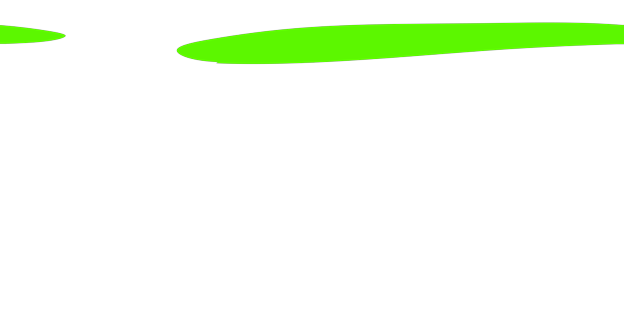

In [2]:
from PIL import Image
from IPython.display import display # to display images in Jupyter Notebook

def combine_images(image1_path, image2_path):
    # Open images
    img1 = Image.open(image1_path).convert('RGBA')
    img2 = Image.open(image2_path).convert('RGBA')

    # Create a new image with the size of image1
    combined = Image.new('RGBA', img1.size)

    # Paste image1 onto the new image
    combined.paste(img1, (0, 0), img1)

    # Paste image2 onto the new image
    combined.paste(img2, (0, 0), img2)

    # Display the combined image
    display(combined)

# Example usage:
image1_path = 'C:/Users/alundkvi/Documents/work/scripts/geojsonImages/picture38.png'
image2_path = 'C:/Users/alundkvi/Documents/work/scripts/geojsonImages/picture37.png'
combine_images(image1_path, image2_path)



In [19]:
from PIL import Image
import os

# Root path containing folders with GeoJSON files
root_folder_path = 'C:/Users/alundkvi/Documents/work/scripts/oval_geojsons_south/temp/'

# List all folders in the root path
folders = [folder for folder in os.listdir(root_folder_path) if os.path.isdir(os.path.join(root_folder_path, folder))]

# Iterate over each folder
for folder in folders:
    # Path to the current folder containing GeoJSON files
    folder_path = os.path.join(root_folder_path, folder)

    # List all files in the folder
    files = os.listdir(folder_path)

    # Filter and sort files based on numeric suffix after 'output'
    images = [filename for filename in files if filename.startswith('output') and (filename.endswith('.jpg') or filename.endswith('.png'))]
    images.sort(key=lambda x: int(x.split('output')[1].split('.')[0]))  # Sort by numeric order

    # Initialize the base image with transparency
    base_image = None

    # Iterate over each image file
    for filename in images:
        # Open the image
        img = Image.open(os.path.join(folder_path, filename)).convert('RGBA')

        # Initialize the base image if not already initialized
        if base_image is None:
            base_image = img.copy()  # Make a copy to preserve original

        # Paste the current image onto the base image
        base_image = Image.alpha_composite(base_image, img)

    # Save or display the combined image for the current folder
    if base_image:
        combined_image_path = os.path.join(root_folder_path, f'combined_images/{folder}.png')
        base_image.save(combined_image_path)  # Save the combined image
        print(f"Combined image saved for folder '{folder}' at: {combined_image_path}")
    else:
        print(f"No images found matching the criteria in folder '{folder}'.")

    # Optionally display the combined image
    # base_image.show()

print("All folders processed.")



Combined image saved for folder '2024-05-10-15-00' at: C:/Users/alundkvi/Documents/work/scripts/oval_geojsons_south/combined_images/2024-05-10-15-00.png
Combined image saved for folder '2024-05-10-15-15' at: C:/Users/alundkvi/Documents/work/scripts/oval_geojsons_south/combined_images/2024-05-10-15-15.png
Combined image saved for folder '2024-05-10-15-30' at: C:/Users/alundkvi/Documents/work/scripts/oval_geojsons_south/combined_images/2024-05-10-15-30.png
Combined image saved for folder '2024-05-10-15-45' at: C:/Users/alundkvi/Documents/work/scripts/oval_geojsons_south/combined_images/2024-05-10-15-45.png
Combined image saved for folder '2024-05-10-16-00' at: C:/Users/alundkvi/Documents/work/scripts/oval_geojsons_south/combined_images/2024-05-10-16-00.png
Combined image saved for folder '2024-05-10-16-15' at: C:/Users/alundkvi/Documents/work/scripts/oval_geojsons_south/combined_images/2024-05-10-16-15.png
Combined image saved for folder '2024-05-10-16-30' at: C:/Users/alundkvi/Documents